In [1]:
!usr/bin/python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import ClassWrap
from lib import general_methods as gm
%matplotlib inline
#sns.set_style('white')

#Each run is an instance of PyHEG
run = ClassWrap.PyHEG(rs=3.0, ndim=3, Nk=5)

/bin/sh: 1: usr/bin/python: not found


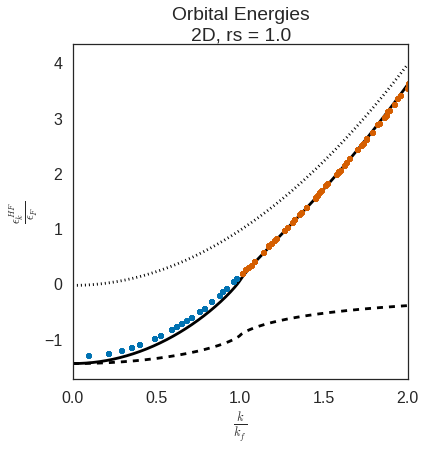

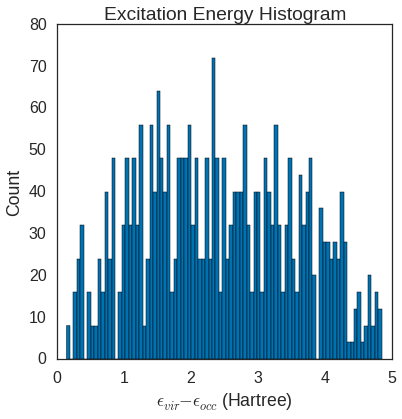

/home/evan/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


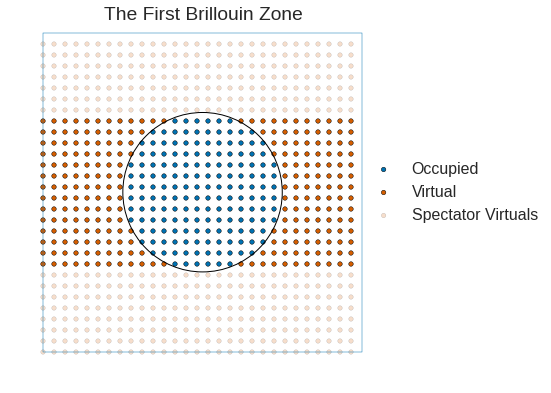

In [2]:
run.Nk = 30 
run.ndim = 2
run.rs = 1.0
sns.set_palette('colorblind')
sns.set_style('white')
sns.set_context('poster')
run.get_resulting_params()
figlen = 6
fig = plt.figure(figsize=(figlen,figlen))
run.plot_energy()
plt.show()
fig = plt.figure(figsize=(figlen,figlen))
run.plot_exc_hist()
plt.show()
fig = plt.figure(figsize=(figlen,figlen))
run.plot_1stBZ(spec_alpha=0.20)
plt.show()

In [3]:
import sys
run.Nk = 5
run.ndim = 2
run.get_resulting_params()
print "Nexc = ", run.Nexc
print "Nocc = ", run.Nocc
print "Nvir = ", run.Nvir
print "Symm = ", np.all(np.isclose(run.mattest.T, run.mattest))
print "Mv is working? ", run.mv_is_working()

Nexc =  9
Nocc =  5
Nvir =  7
Symm =  True
Mv is working?  True


In [4]:
print run.N_elec

10


In [5]:
from mayavi import mlab

ValueError: API 'QString' has already been set to version 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
import itertools
import math
import seaborn as sns
import pstats, cProfile